In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('FINAL FOOD DATASET/FOOD-DATA-GROUP1.csv')
df2 = pd.read_csv('FINAL FOOD DATASET/FOOD-DATA-GROUP2.csv')
df3 = pd.read_csv('FINAL FOOD DATASET/FOOD-DATA-GROUP3.csv')
df4 = pd.read_csv('FINAL FOOD DATASET/FOOD-DATA-GROUP4.csv')
df5 = pd.read_csv('FINAL FOOD DATASET/FOOD-DATA-GROUP5.csv')

In [3]:
food_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [4]:
food_df.head()
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2395 non-null   int64  
 1   Unnamed: 0            2395 non-null   int64  
 2   food                  2395 non-null   object 
 3   Caloric Value         2395 non-null   int64  
 4   Fat                   2395 non-null   float64
 5   Saturated Fats        2395 non-null   float64
 6   Monounsaturated Fats  2395 non-null   float64
 7   Polyunsaturated Fats  2395 non-null   float64
 8   Carbohydrates         2395 non-null   float64
 9   Sugars                2395 non-null   float64
 10  Protein               2395 non-null   float64
 11  Dietary Fiber         2395 non-null   float64
 12  Cholesterol           2395 non-null   float64
 13  Sodium                2395 non-null   float64
 14  Water                 2395 non-null   float64
 15  Vitamin A            

In [5]:
# Drop unnecessary columns
food_df.to_csv('food_dataset.csv', index=False)

In [6]:
food_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [7]:
# Check for missing values
print(food_df.isnull().sum())

food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64


In [8]:
# Convert columns to appropriate data types
numeric_columns = food_df.select_dtypes(include=['float64', 'int64']).columns
food_df[numeric_columns] = food_df[numeric_columns].astype(float)

In [9]:
# Generate descriptive statistics
print(food_df.describe())

       Caloric Value          Fat  Saturated Fats  Monounsaturated Fats  \
count    2395.000000  2395.000000     2395.000000           2395.000000   
mean      223.769520    10.176276        3.924917              4.133622   
std       384.728244    29.008915       19.502262             12.939587   
min         0.000000     0.000000        0.000000              0.000000   
25%        44.500000     0.300000        0.064000              0.058000   
50%       117.000000     2.100000        0.500000              0.500000   
75%       258.000000     9.400000        2.700000              3.400000   
max      6077.000000   550.700000      672.000000            291.100000   

       Polyunsaturated Fats  Carbohydrates       Sugars      Protein  \
count           2395.000000    2395.000000  2395.000000  2395.000000   
mean               2.152844      18.589021     4.457459    13.400777   
std                7.145738      29.406134    13.339929    32.294246   
min                0.000000       0.

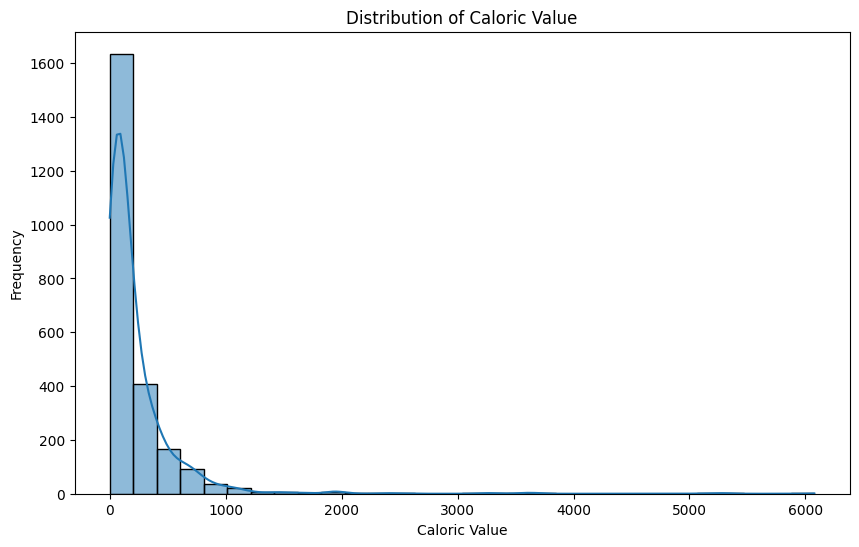

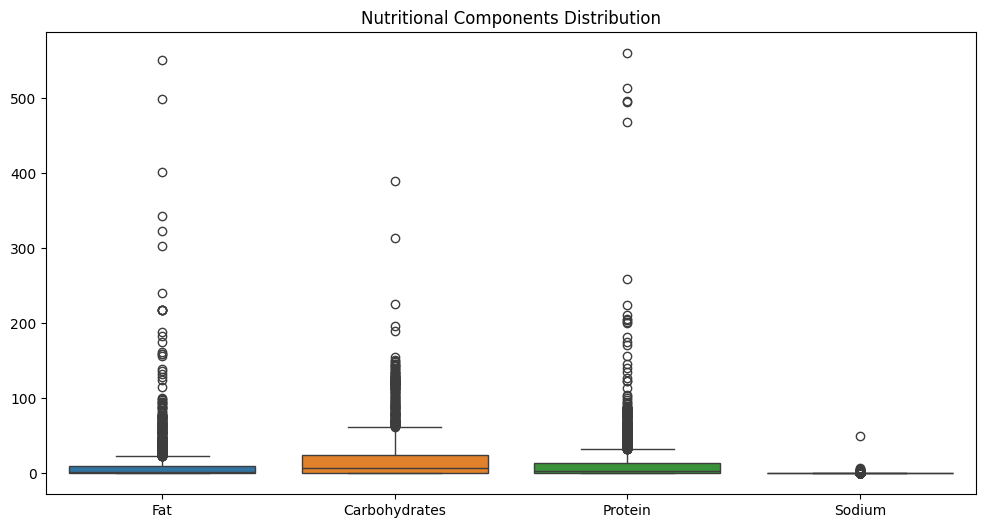

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for calorie distribution
plt.figure(figsize=(10, 6))
sns.histplot(food_df['Caloric Value'], bins=30, kde=True)
plt.title('Distribution of Caloric Value')
plt.xlabel('Caloric Value')
plt.ylabel('Frequency')
plt.show()

# Boxplot for nutritional components
plt.figure(figsize=(12, 6))
sns.boxplot(data=food_df[['Fat', 'Carbohydrates', 'Protein', 'Sodium']])
plt.title('Nutritional Components Distribution')
plt.show()

food                     object
Caloric Value           float64
Fat                     float64
Saturated Fats          float64
Monounsaturated Fats    float64
Polyunsaturated Fats    float64
Carbohydrates           float64
Sugars                  float64
Protein                 float64
Dietary Fiber           float64
Cholesterol             float64
Sodium                  float64
Water                   float64
Vitamin A               float64
Vitamin B1              float64
Vitamin B11             float64
Vitamin B12             float64
Vitamin B2              float64
Vitamin B3              float64
Vitamin B5              float64
Vitamin B6              float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Calcium                 float64
Copper                  float64
Iron                    float64
Magnesium               float64
Manganese               float64
Phosphorus              float64
Potassiu

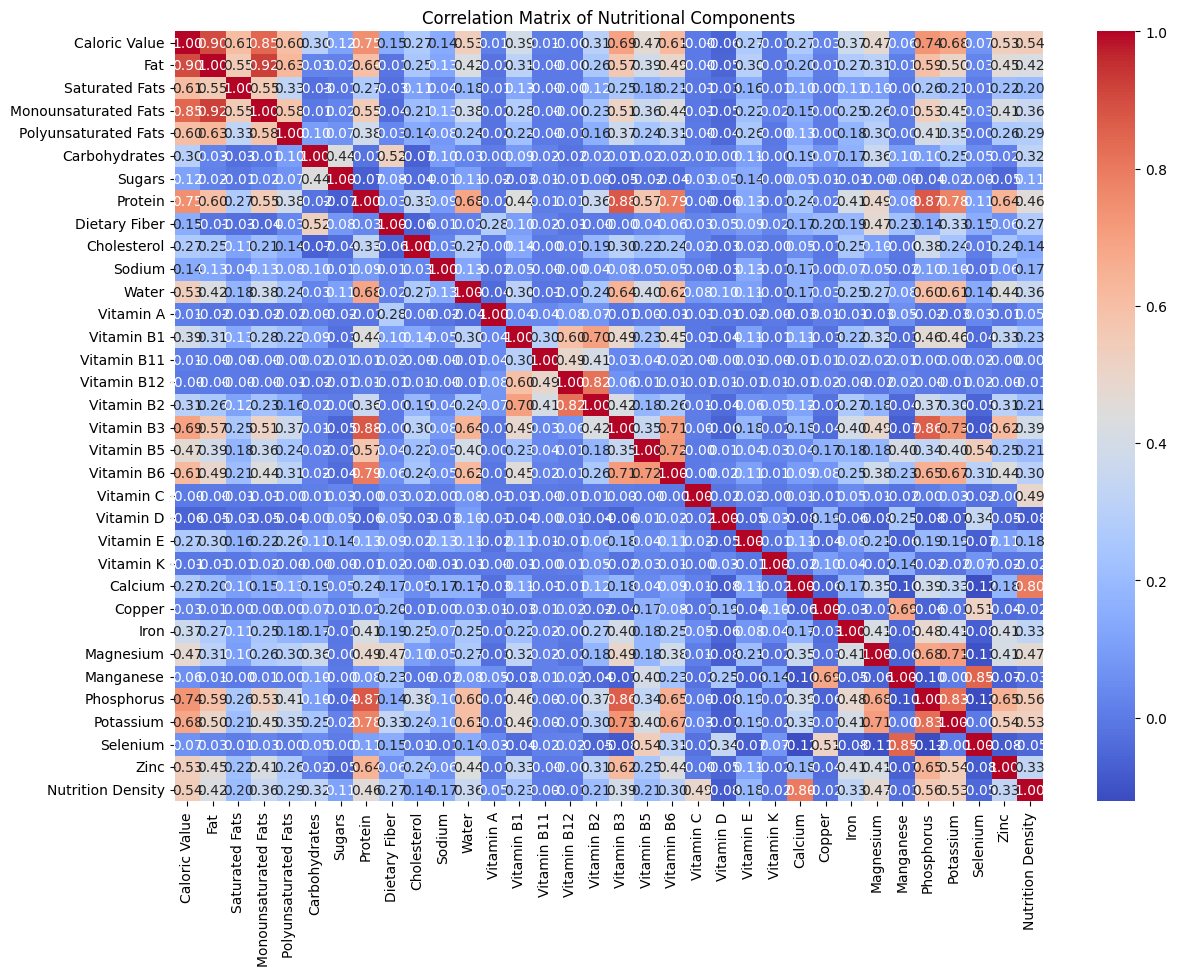

In [12]:
# Step 1: Check the data types of all columns
print(food_df.dtypes)

# Step 2: Select only numeric columns for correlation
numeric_df = food_df.select_dtypes(include=['float64', 'int64'])

# Step 3: Generate the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = numeric_df.corr()  # Use the filtered DataFrame
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Nutritional Components')
plt.show()

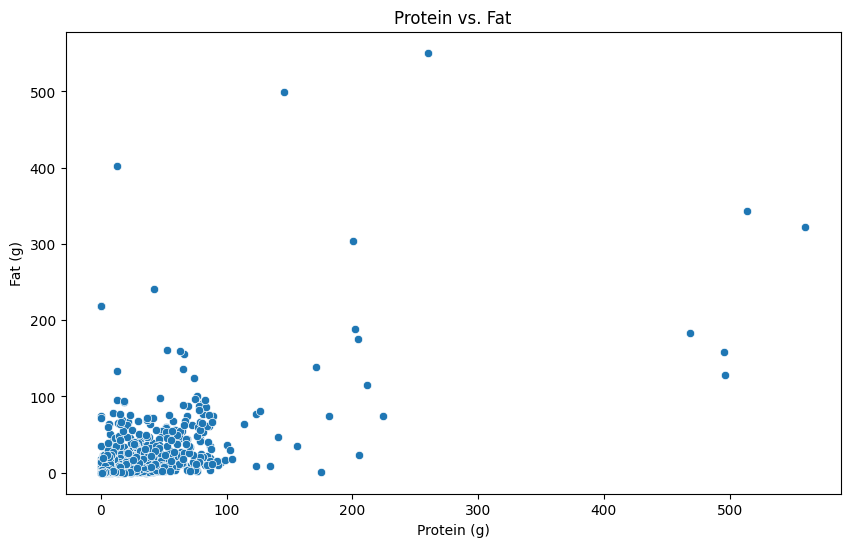

In [13]:
# Scatter plot for two strongly correlated nutrients
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numeric_df, x='Protein', y='Fat')  # Example of correlated nutrients
plt.title('Protein vs. Fat')
plt.xlabel('Protein (g)')
plt.ylabel('Fat (g)')
plt.show()

In [14]:

# Avoiding division by zero errors: Adding a small constant to denominators if needed
epsilon = 1e-10

# 1. Carbohydrate to Protein Ratio
food_df['Carbohydrate_to_Protein_Ratio'] = food_df['Carbohydrates'] / (food_df['Protein'] + epsilon)

# 2. Carbohydrate to Fat Ratio
food_df['Carbohydrate_to_Fat_Ratio'] = food_df['Carbohydrates'] / (food_df['Fat'] + epsilon)

# 3. Fiber to Carbohydrate Ratio
food_df['Fiber_to_Carbohydrate_Ratio'] = food_df['Dietary Fiber'] / (food_df['Carbohydrates'] + epsilon)

# 4. Sodium to Potassium Ratio
food_df['Sodium_to_Potassium_Ratio'] = food_df['Sodium'] / (food_df['Potassium'] + epsilon)

# 5. Caloric Density (Calories per Gram)
food_df['Caloric_Density'] = food_df['Caloric Value'] / (food_df['Water'] + food_df['Fat'] + food_df['Protein'] + food_df['Carbohydrates'] + epsilon)

# Display the first few rows to verify the new columns
food_df.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Carbohydrate_to_Protein_Ratio,Carbohydrate_to_Fat_Ratio,Fiber_to_Carbohydrate_Ratio,Sodium_to_Potassium_Ratio,Caloric_Density
0,cream cheese,51.0,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.091,15.5,19.100,0.039,7.070,0.888889,0.160000,0.000000,0.001032,3.566434
1,neufchatel cheese,215.0,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,117.300,129.2,0.054,0.700,130.100,0.397436,0.159794,0.000000,0.002322,2.562574
2,requeijao cremoso light catupiry,49.0,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.0,0.000,0.000,5.400,1.125000,0.250000,0.111111,0.000000,9.245283
3,ricotta cheese,30.0,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.024,30.8,43.800,0.035,5.196,1.000000,0.750000,0.000000,0.000552,1.522843
4,cream cheese low fat,30.0,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.800,37.1,0.034,0.053,27.007,1.000000,0.521739,0.000000,0.001240,2.040816


In [15]:
# Summary of new feature columns
food_df[['Carbohydrate_to_Protein_Ratio', 'Carbohydrate_to_Fat_Ratio', 
         'Fiber_to_Carbohydrate_Ratio', 'Sodium_to_Potassium_Ratio', 
         'Caloric_Density']].describe()

,Carbohydrate_to_Protein_Ratio,Carbohydrate_to_Fat_Ratio,Fiber_to_Carbohydrate_Ratio,Sodium_to_Potassium_Ratio,Caloric_Density
count,2.395000e+03,2.395000e+03,2.395000e+03,2.395000e+03,2.395000e+03
mean,5.525282e+09,6.611583e+09,1.043841e+07,6.146973e+07,1.402923e+09
std,7.777160e+10,6.317872e+10,5.108428e+08,8.145338e+08,3.793261e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e-01,2.092175e-01,0.000000e+00,1.886118e-04,8.052462e-01
50%,3.202247e+00,3.787879e+00,3.243243e-02,9.590517e-04,1.903090e+00
75%,9.396264e+00,3.068696e+01,1.531723e-01,3.556301e-03,3.580208e+00
max,3.137000e+12,1.964000e+12,2.500000e+10,1.800000e+10,1.220000e+12


In [16]:
food_df.to_csv('food_dataset_new.csv', index=False)